# Part II - Ford GoBike System 
## by Richmond Tetteh

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Distribution of the log duration of bike ride

> Distribution of the user type vs member gender

>  Bar plot of durations, user_type and member_gende

>  Bar plot of durations, user_type and member_gender



## Dataset Overview

>  The dataset I used was the Ford GoBike System Data. There were initially 183,412 entries in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender  and bike_share_for_all_trip) but after assessing and cleaning my dataset there are 174952 entries with 16 features in the dataset. Most variables are numeric in nature, but the variables start_time, end_time, start_station_name, end_station_name, member_gender and bike_share_for_all_trip are non-numeric.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Cleaning Data
# Make copies of original pieces of data
bike_data_clean = bike_data.copy()

In [4]:
#  Issue #1: NaN values in Data to be removed (member_gender, member_birth_year and start_station_name columns)

# Define: 
#Remove the rows that have have associating NaN values in the member_gender, member_birth_year and start_station_name  columns.

# Code: 
bike_data_clean = bike_data_clean.dropna().reset_index(drop=True)

# Test:
bike_data_clean.start_station_name.isna().value_counts()

False    174952
Name: start_station_name, dtype: int64

In [5]:
#  Issue #2: Erroneous datatypes (start_time and end_time)

# Define: 
#Convert start_time and end_time to datatype integer

# Code: 
# To datatime
bike_data_clean.start_time = pd.to_datetime(bike_data_clean.start_time)
bike_data_clean.end_time = pd.to_datetime(bike_data_clean.end_time)
                                            

# Test:
#start_time and end_time should be in datetime
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [6]:
# Storing Data
# Save gathered, assessed, and cleaned master dataset to a CSV file named "bike_archive_master.csv.

bike_data_clean.to_csv('bike_archive_master', index = False)

In [7]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_archive_master')

## Distribution of the log duration of bike ride

> Under a log scale, I observed that the data for the duration is roughly unimodal with a large peak somewhere between 400 and 600. The duration distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

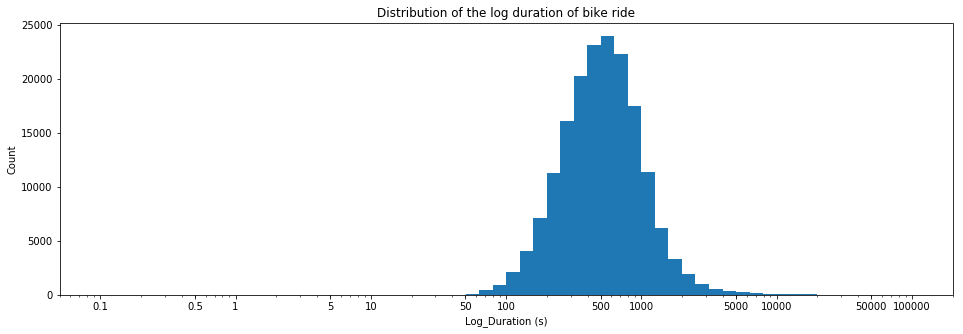

In [8]:
plt.figure(figsize=[16,5])
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000,5000,10000,50000,100000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=bike, x='duration_sec', bins=bins);
plt.title('Distribution of the log duration of bike ride')
plt.xlabel('Log_Duration (s)')
plt.ylabel('Count')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

## Distribution  of the user type vs member gender

> I observed that the subscribers have the most members with the highest count spread across the various genders. The male gender is the most dominating gender by count or frequency for both the user types followed by the female gender and the other gender.

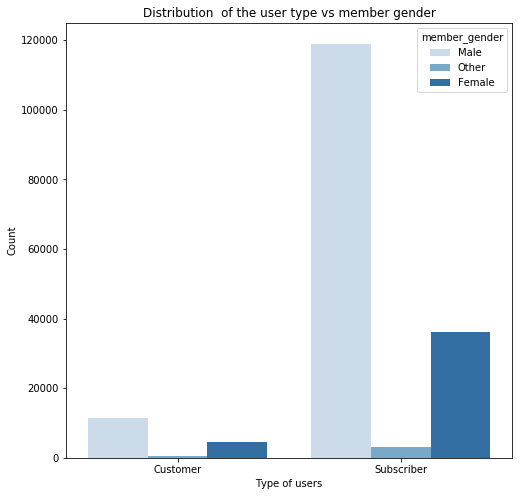

In [9]:
plt.figure(figsize = [8, 8])

sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Blues');
plt.title('Distribution  of the user type vs member gender')
plt.xlabel('Type of users')
plt.ylabel('Count');


## Bar plot of durations, user_type and member_gender

> I observed that all the genders in the customer category that patronize the bike system record the highest number of duration riding their bike. The other gender have the highest frequency or count for the duration recorded for both the customers and subscribers.

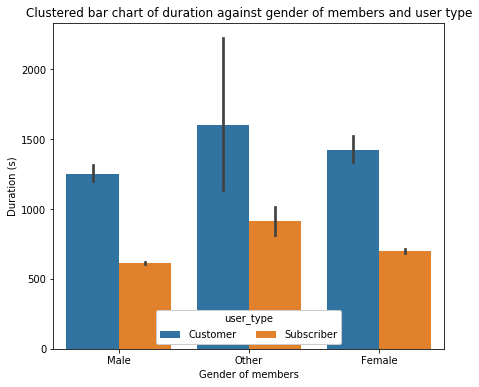

In [10]:
# A clustered bar chart
plt.figure(figsize = [7,6])
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
ax.legend(loc = 8, ncol = 7, framealpha = 1, title = 'user_type');
plt.title('Clustered bar chart of duration against gender of members and user type');
plt.xlabel('Gender of members')
plt.ylabel('Duration (s)');

## Bar plot  distribution of durations,  member_gender and bike_share_for_all_trip

> I observed that the other gender has the highest frequency for the duration spent for riders who share their bike for all trip and those that do not share their bike for all trip. The male gender has the lowest frequency for both riders who share their bike for all trip and those that do not share their bike for all trip. From the graph I also observed that the three gender categories the highest number occuring frequency for those that do not share their ride for all trip is greater than those that do share their bike for all trip.



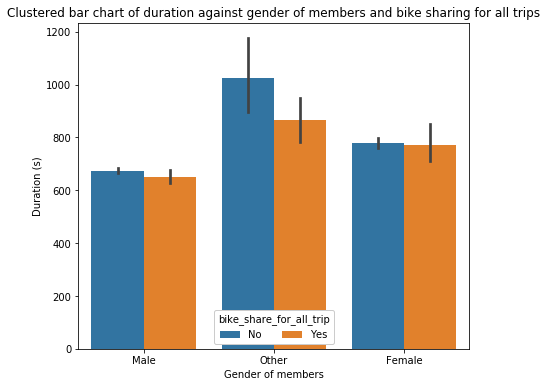

In [11]:
# A clustered bar chart
plt.figure(figsize = [7,6])
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip');
ax.legend(loc = 8, ncol = 7, framealpha = 1, title = 'bike_share_for_all_trip');
plt.title('Clustered bar chart of duration against gender of members and bike sharing for all trips');
plt.xlabel('Gender of members')
plt.ylabel('Duration (s)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Ford_GoBike_System_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Ford_GoBike_System_slide_deck: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 